### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from scipy.stats import trim_mean,variation

**Load the adults income dataset and print first five observations**

In [2]:
df1=pd.read_csv('adult_income.csv')
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


In [3]:
(df1[df1['race']=='Asian-Pac-Islander'].count()[1])/df1['race'].value_counts()[1]

0.3325864276568502

### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df1.groupby(by='sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

In [37]:
# type your code here
pd.pivot_table(data=df1,index='sex',values='age',aggfunc='mean')

,age
sex,
0,39.433547
1,36.858230


In [7]:
df1.groupby(by='sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df1.shape

(32561, 15)

In [9]:
df1['capital.gain'].quantile(0.95)

5013.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df1['education'].mode()

0    HS-grad
Name: education, dtype: object

In [11]:
df1.education.mode()

0    HS-grad
Name: education, dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df1.groupby(by='workclass')['age'].median()

workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df1['capital.gain'].mean()

1077.6488437087312

In [14]:
trim_mean(df1['capital.gain'],proportiontocut=0.05)

113.80921344480464

<AxesSubplot:ylabel='Density'>

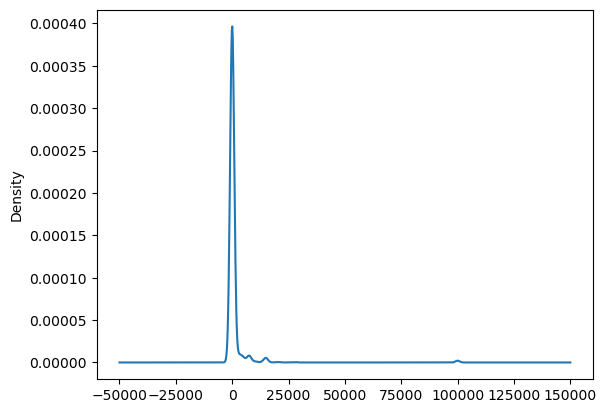

In [15]:
df1['capital.gain'].plot(kind='kde')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df1[df1['race']=='Asian-Pac-Islander']['race'].count()

1039

In [39]:
df1[df1['race']=='Asian-Pac-Islander']['race'].count()/df1.race.count()*100

3.190933939375326

In [18]:
df1.race.count()

32561

In [19]:
df1['race'].count()

32561

In [20]:
(df1[df1['race']=='Asian-Pac-Islander'].count()[1])

1039

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df1.groupby(by='occupation')['hours.per.week'].var().sort_values()

occupation
Machine-op-inspct     57.648955
Craft-repair          81.939394
Adm-clerical          91.964888
Handlers-cleaners    111.946104
Tech-support         112.001859
Exec-managerial      123.412395
Protective-serv      152.072728
Prof-specialty       157.159186
Other-service        161.442544
Transport-moving     161.833503
Sales                175.202547
Armed-Forces         198.000000
?                    225.317543
Priv-house-serv      261.939597
Farming-fishing      299.987814
Name: hours.per.week, dtype: float64

In [41]:
# type your code here
df1.groupby(by='occupation')['hours.per.week'].var().sort_values()

occupation
Machine-op-inspct     57.648955
Craft-repair          81.939394
Adm-clerical          91.964888
Handlers-cleaners    111.946104
Tech-support         112.001859
Exec-managerial      123.412395
Protective-serv      152.072728
Prof-specialty       157.159186
Other-service        161.442544
Transport-moving     161.833503
Sales                175.202547
Armed-Forces         198.000000
?                    225.317543
Priv-house-serv      261.939597
Farming-fishing      299.987814
Name: hours.per.week, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
q1= df1['hours.per.week'].quantile(0.25)
q3= df1['hours.per.week'].quantile(0.75)
iqr= q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(iqr)
print(ll)
print(ul)

5.0
32.5
52.5


In [24]:
q1=df1['hours.per.week'].quantile(0.25)
q3=df1['hours.per.week'].quantile(0.75)
iqr=q3-q1
iqr

5.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
for i in df1.select_dtypes(exclude=object).columns:
    print(i,variation(df1[i]))

age 0.3535417546795915
fnlwgt 0.5561664315103562
education.num 0.25520907259816383
sex 1.422330759276723
capital.gain 6.853047465379832
capital.loss 4.615536707276107
hours.per.week 0.3056661031982937


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# df1=df1.replace('?',pd.NaT)
df1.groupby(by='workclass')['hours.per.week'].std()/ df1.groupby(by='workclass')['hours.per.week'].mean()*100


# pd.Nat is a constant in pandas liblary that represent the undefined date/ time value 
# CV = (standard deviation / mean) * 100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
df1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [28]:
for i in df1.select_dtypes(object):
    print(i)

workclass
education
marital.status
occupation
relationship
race
native.country
income


In [29]:
for i in df1.select_dtypes(include=object):
    print(i)

workclass
education
marital.status
occupation
relationship
race
native.country
income


workclass


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


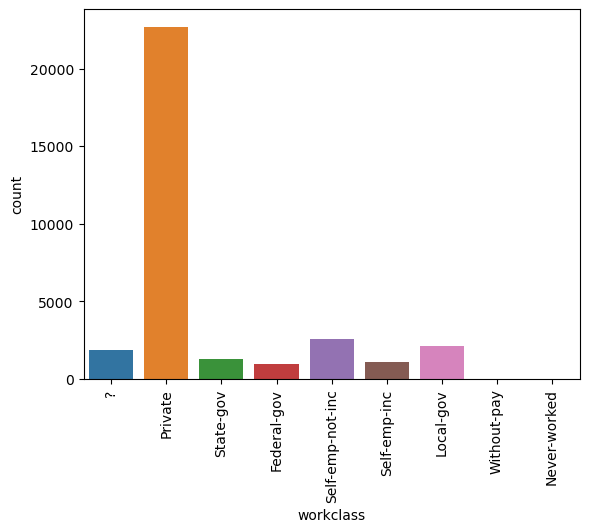

education


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


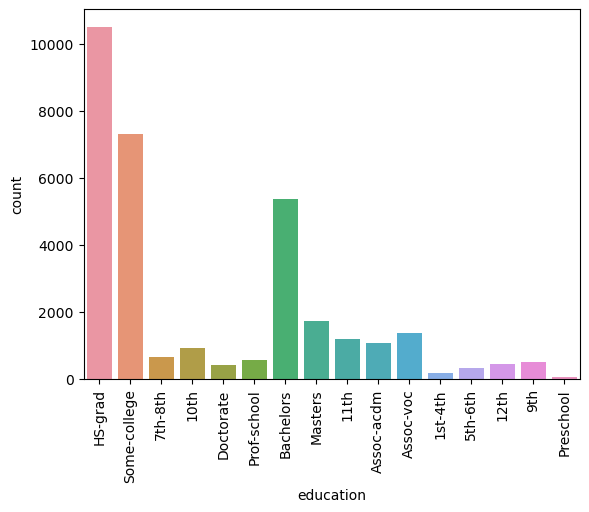

marital.status


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


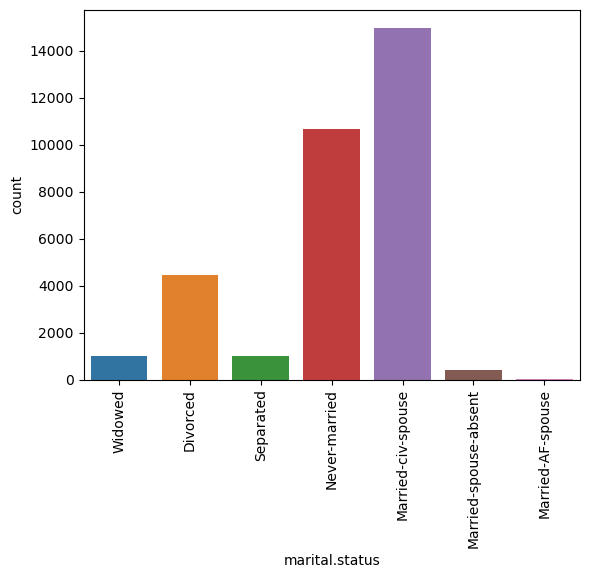

occupation


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


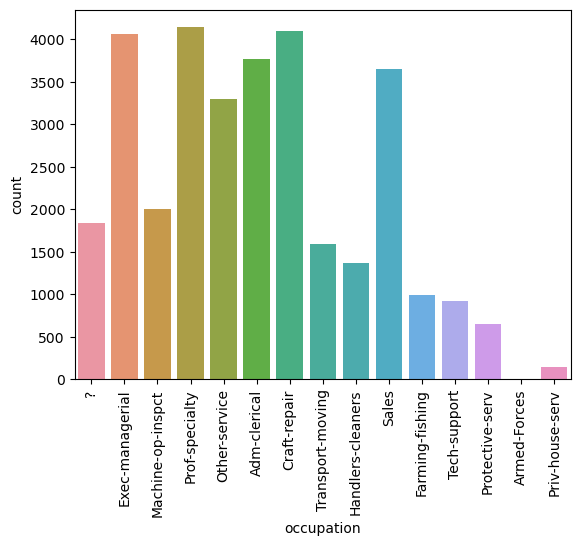

relationship


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


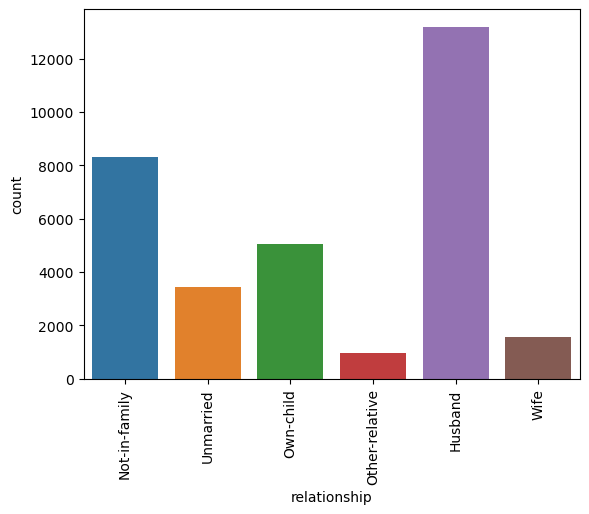

race


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


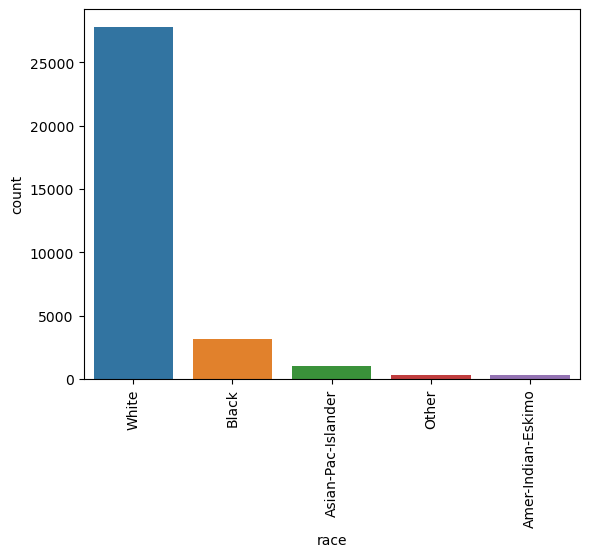

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


native.country


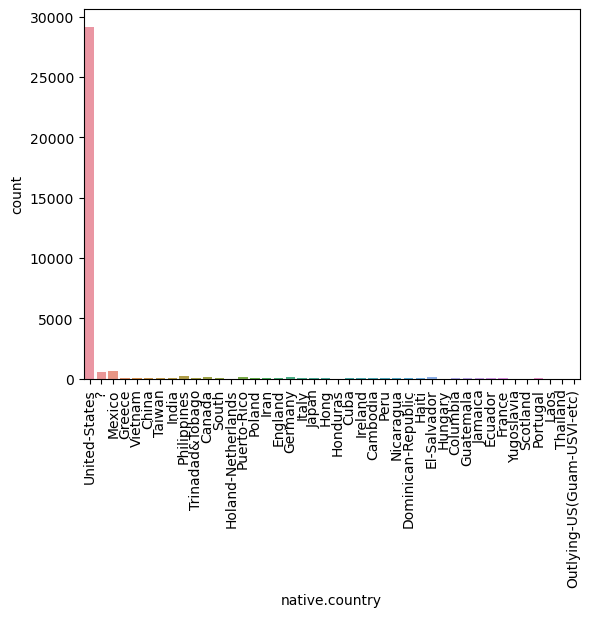

income


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


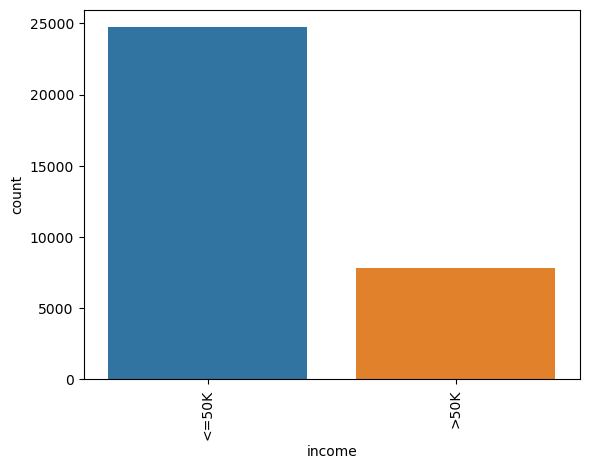

In [30]:
# df1.head()
import matplotlib.pyplot as plt
# # .pyplot is importing only pyplot module from matplotlib
# def pl0t_categorical_variable(df, column):
#     plt_categorical_variable(df1,'workclass')
#     plt.plot()
#counts = df1['workclass'].value_counts()

for i in df1.select_dtypes(include=object):
    print(i)
    sns.countplot(df1[i])
    plt.xticks(rotation=90)
    plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df1.skew()

C:\Users\jainh\AppData\Local\Temp\ipykernel_3824\149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
df1.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K


In [33]:
for i in df1.select_dtypes(include=object):
    print(i)

workclass
education
marital.status
occupation
relationship
race
native.country
income


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
df1['hours.per.week'].mode()[0]

40

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# for i in df1.select_dtypes(exclude='object')

age 0.5587433694130483
fnlwgt 1.4469800945789828
education.num -0.31167586791022966
sex 0.7192925505964604
capital.gain 11.953847687699794
capital.loss 4.594629121679696
hours.per.week 0.22224067717684567


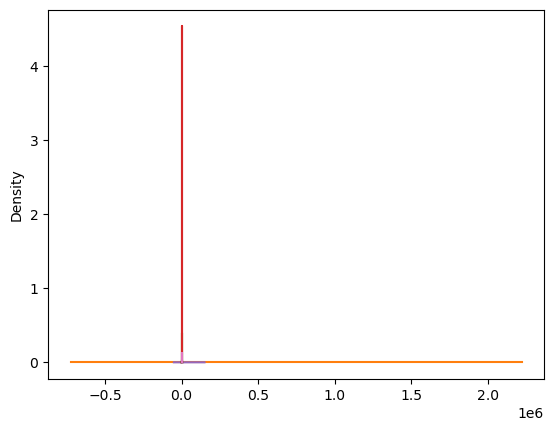

In [48]:
for i in df1.select_dtypes(exclude=object):
    print(i,df1[i].skew())
    df1[i].plot(kind='kde')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

age -0.16612745957143993


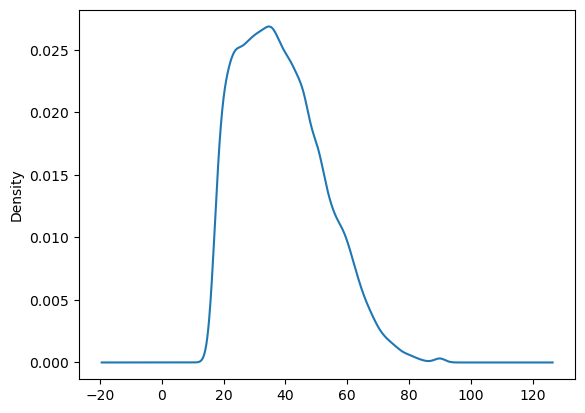

fnlwgt 6.218810978153803


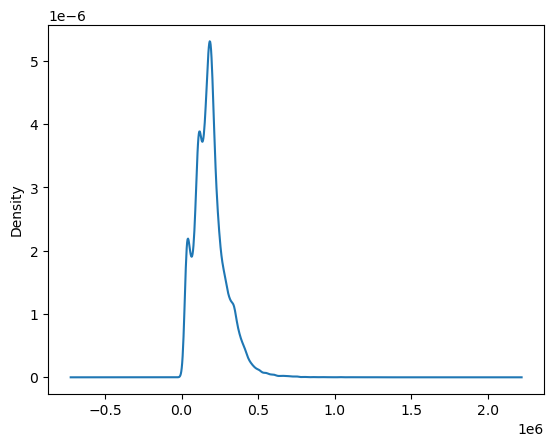

education.num 0.6234440747629244


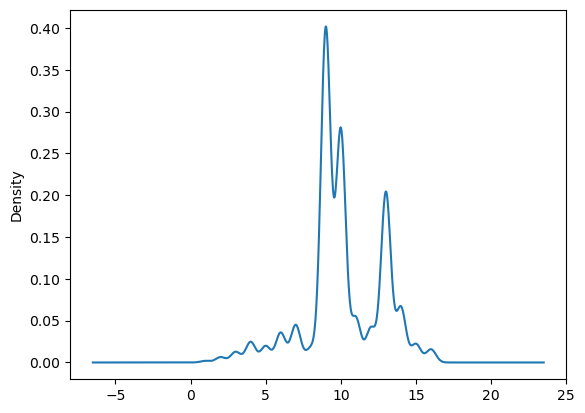

sex -1.48270930314248


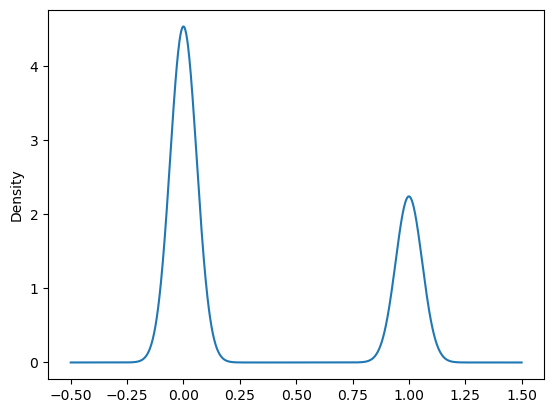

capital.gain 154.7994378542533


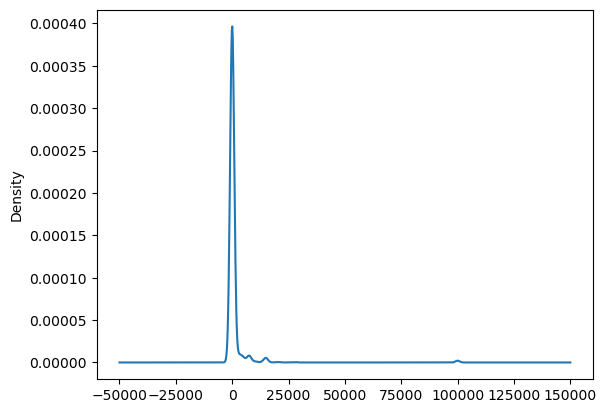

capital.loss 20.37680171341222


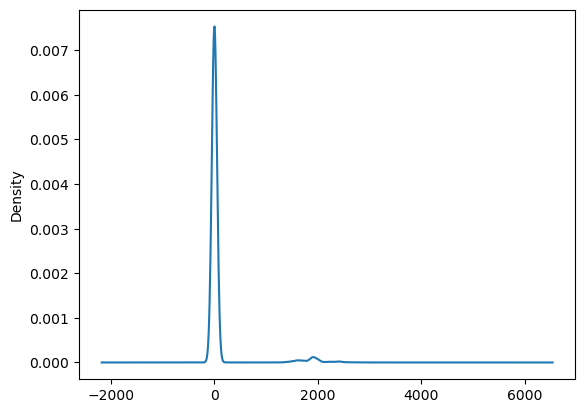

hours.per.week 2.916782490794851


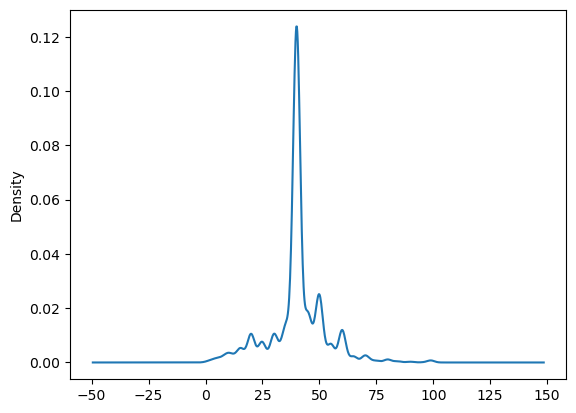

In [49]:
for i in df1.select_dtypes(include=np.number):
    print(i,df1[i].kurt())
    df1[i].plot(kind='kde')
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

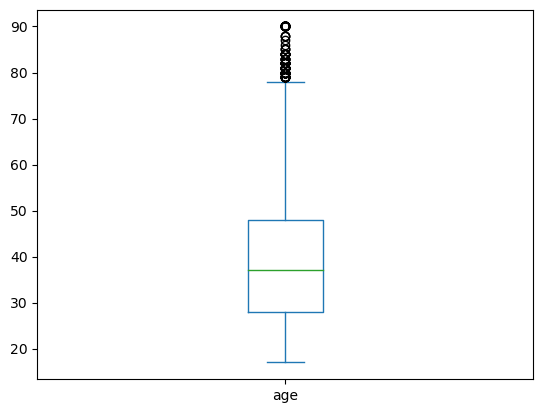

In [50]:
df1.age.plot(kind='box')
#sns.boxplot(data=df1['age'])

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
df1['age'].corr(df1['hours.per.week'])

0.06931085288793035

In [52]:
df1[['age','hours.per.week']].corr()

,age,hours.per.week
age,1.000000,0.069311
hours.per.week,0.069311,1.000000


<AxesSubplot:>

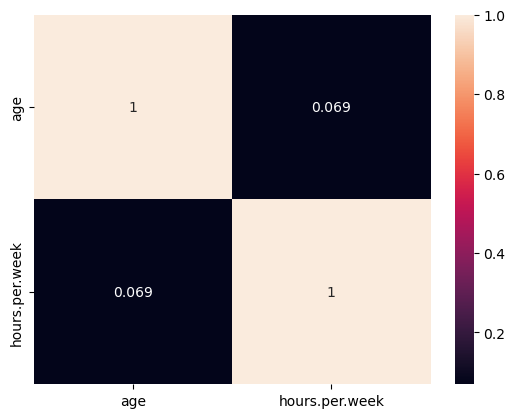

In [53]:
sns.heatmap(df1[['age','hours.per.week']].corr(),annot=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
corr_matrix=df1.corr()
mask=np.zeros_like(corr_matrix)
mask[np.tril_indices_from(mask,k=-1)]=True
sns.heatmap(corr_matrix,mask=mask,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
np.zeros_like(df1.corr())


In [ ]:
np.tril_indices_from(np.zeros_like(df1.corr()),k=0)

In [ ]:
a=np.tril(np.zeros_like(df1.corr(), dtype=bool))

In [ ]:
sns.heatmap(df1.corr(),mask=a,annot=True,cmap='coolwarm')
